In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU
from datetime import datetime

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# **Chia train test theo tỉ lệ 8:2**

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('Btc.csv')
df1=df.reset_index()['Close']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train, test
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
# 8. Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 6s 138ms/step - loss: 0.0186 - val_loss: 0.0140
Epoch 2/100
23/23 [==============================] - 2s 79ms/step - loss: 0.0021 - val_loss: 7.0930e-04
Epoch 3/100
23/23 [==============================] - 1s 51ms/step - loss: 5.9572e-04 - val_loss: 7.0576e-04
Epoch 4/100
23/23 [==============================] - 1s 60ms/step - loss: 5.2716e-04 - val_loss: 7.5832e-04
Epoch 5/100
23/23 [==============================] - 1s 55ms/step - loss: 4.9650e-04 - val_loss: 6.9677e-04
Epoch 6/100
23/23 [==============================] - 1s 50ms/step - loss: 4.8076e-04 - val_loss: 6.1051e-04
Epoch 7/100
23/23 [==============================] - 1s 49ms/step - loss: 4.6587e-04 - val_loss: 6.6436e-04
Epoch 8/100
23/23 [==============================] - 1s 50ms/step - loss: 4.4979e-04 - val_loss: 5.6304e-04
Epoch 9/100
23/23 [==============================] - 1s 50ms/step - loss: 4.3978e-04 - val_loss: 7.3839e-04
Epoch 10/100
23/23 [===================

In [10]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred_test=model.predict(X_test)

9/9 [==============================] - 0s 11ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred_test=scaler.inverse_transform(y_pred_test)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [12]:
# 12. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, y_test)
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred_test, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 949.2632507729679
Testing RMSE: 1421.9452229072674
Testing MAPE: 0.019234964235937572


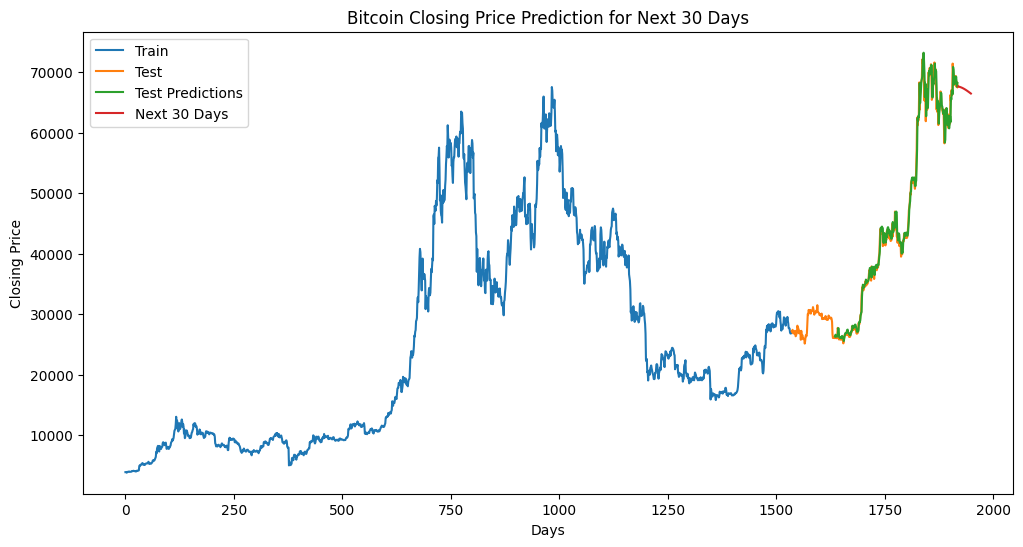

Predicted closing prices for the next 30 days:
[67650.39  67635.96  67618.37  67597.6   67574.83  67549.76  67522.65
 67493.47  67462.35  67429.305 67394.31  67357.78  67319.516 67279.66
 67238.266 67195.45  67151.26  67105.68  67058.914 67010.984 66962.06
 66912.29  66861.78  66810.414 66758.44  66706.    66652.836 66599.34
 66545.53  66491.35 ]


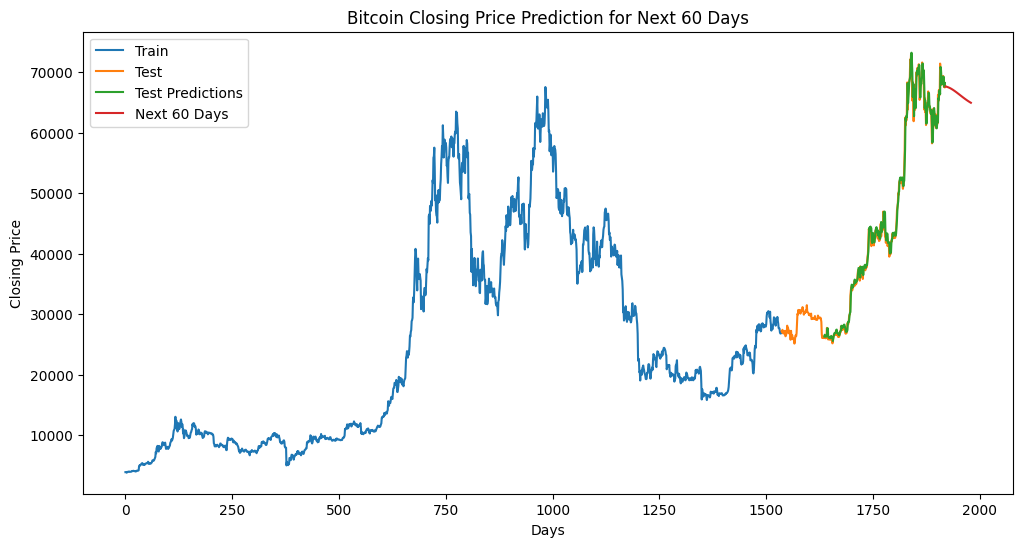

Predicted closing prices for the next 60 days:
[67650.39  67635.96  67618.37  67597.6   67574.83  67549.76  67522.65
 67493.47  67462.35  67429.305 67394.31  67357.78  67319.516 67279.66
 67238.266 67195.45  67151.26  67105.68  67058.914 67010.984 66962.06
 66912.29  66861.78  66810.414 66758.44  66706.    66652.836 66599.34
 66545.53  66491.35  66436.81  66381.96  66326.95  66271.84  66216.64
 66161.48  66106.34  66051.29  65996.49  65942.07  65887.89  65833.96
 65780.44  65727.266 65674.5   65622.16  65570.39  65519.113 65468.473
 65418.586 65369.477 65321.043 65273.46  65226.67  65180.797 65135.7
 65091.477 65048.1   65005.633 64964.01 ]


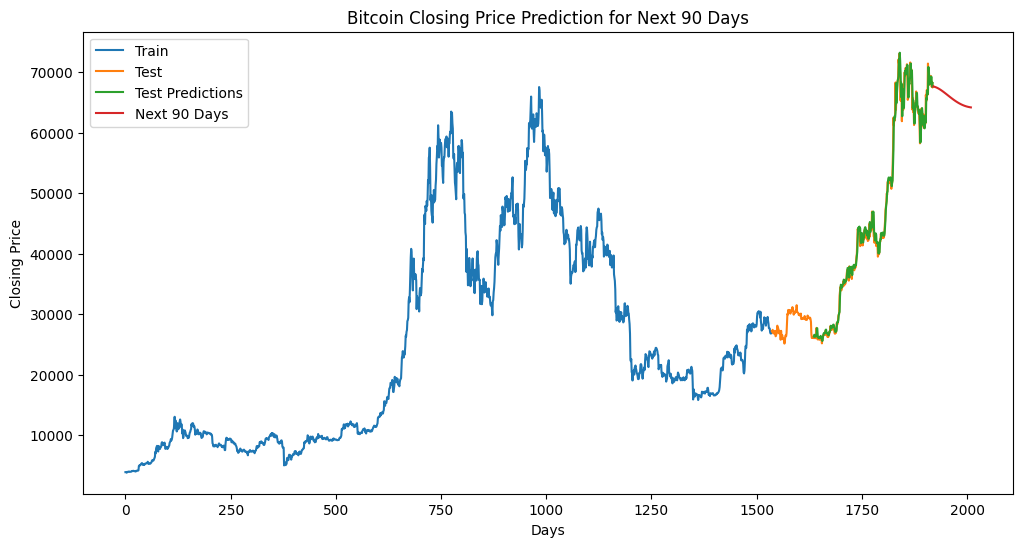

Predicted closing prices for the next 90 days:
[67650.39  67635.96  67618.37  67597.6   67574.83  67549.76  67522.65
 67493.47  67462.35  67429.305 67394.31  67357.78  67319.516 67279.66
 67238.266 67195.45  67151.26  67105.68  67058.914 67010.984 66962.06
 66912.29  66861.78  66810.414 66758.44  66706.    66652.836 66599.34
 66545.53  66491.35  66436.81  66381.96  66326.95  66271.84  66216.64
 66161.48  66106.34  66051.29  65996.49  65942.07  65887.89  65833.96
 65780.44  65727.266 65674.5   65622.16  65570.39  65519.113 65468.473
 65418.586 65369.477 65321.043 65273.46  65226.67  65180.797 65135.7
 65091.477 65048.1   65005.633 64964.01  64923.363 64883.742 64845.09
 64807.47  64770.867 64735.297 64700.785 64667.465 64635.293 64604.13
 64573.93  64544.76  64516.695 64489.715 64463.863 64439.113 64415.4
 64392.85  64371.355 64350.895 64331.465 64313.094 64295.566 64279.05
 64263.457 64248.8   64235.04  64222.008 64209.895 64198.664]


In [13]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred_test)), y_pred_test, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **Chia train test theo tỉ lệ 7:3**

In [14]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('Btc.csv')
df1=df.reset_index()['Close']

In [15]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
# 4. Chia train, test, validate
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [17]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [19]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
# 8. Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 4s 74ms/step - loss: 0.0366 - val_loss: 0.0050
Epoch 2/100
20/20 [==============================] - 1s 50ms/step - loss: 0.0050 - val_loss: 0.0025
Epoch 3/100
20/20 [==============================] - 1s 50ms/step - loss: 8.5326e-04 - val_loss: 5.6424e-04
Epoch 4/100
20/20 [==============================] - 1s 51ms/step - loss: 6.3238e-04 - val_loss: 4.8245e-04
Epoch 5/100
20/20 [==============================] - 1s 50ms/step - loss: 5.5218e-04 - val_loss: 4.7237e-04
Epoch 6/100
20/20 [==============================] - 1s 51ms/step - loss: 5.3634e-04 - val_loss: 4.5096e-04
Epoch 7/100
20/20 [==============================] - 2s 93ms/step - loss: 5.1719e-04 - val_loss: 4.8634e-04
Epoch 8/100
20/20 [==============================] - 2s 83ms/step - loss: 5.0531e-04 - val_loss: 4.2638e-04
Epoch 9/100
20/20 [==============================] - 1s 53ms/step - loss: 4.9966e-04 - val_loss: 4.1482e-04
Epoch 10/100
20/20 [========================

In [22]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred_test=model.predict(X_test)

15/15 [==============================] - 0s 10ms/step


In [23]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred_test=scaler.inverse_transform(y_pred_test)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [24]:
# 12. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, y_test)
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred_test, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 770.4513817
Testing RMSE: 1243.759672367024
Testing MAPE: 0.018701859806202464


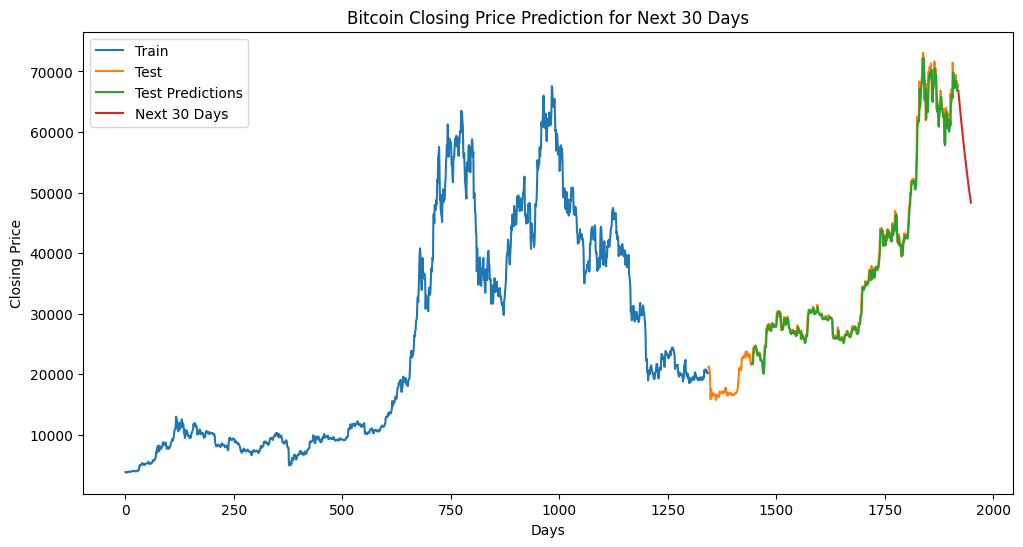

Predicted closing prices for the next 30 days:
[66820.234 66109.375 65356.562 64603.875 63859.05  63122.715 62395.758
 61678.066 60969.938 60271.24  59581.863 58902.695 58233.062 57573.23
 56923.14  56282.86  55652.297 55031.25  54419.984 53818.316 53226.535
 52644.7   52072.89  51510.605 50958.22  50415.895 49882.773 49359.55
 48845.965 48341.816]


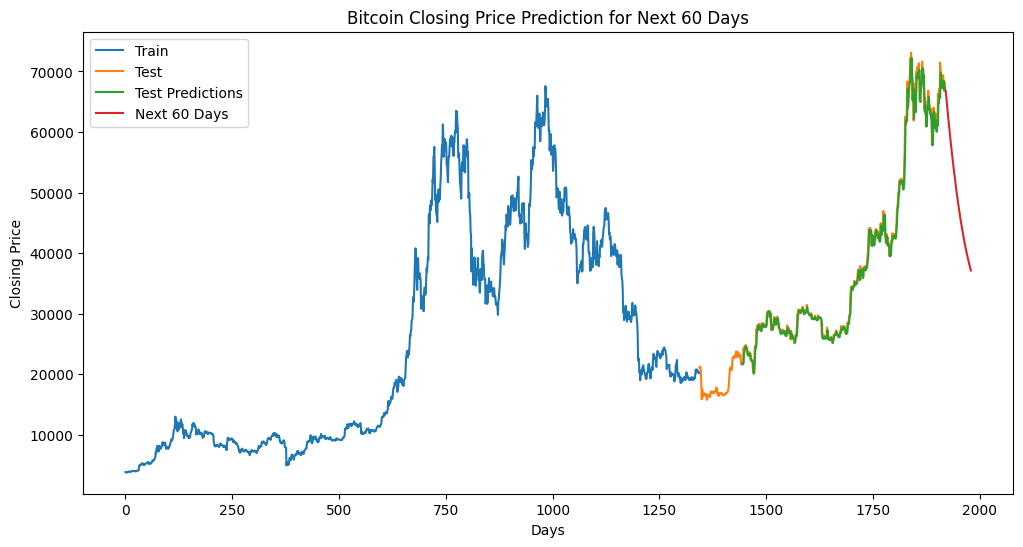

Predicted closing prices for the next 60 days:
[66820.234 66109.375 65356.562 64603.875 63859.05  63122.715 62395.758
 61678.066 60969.938 60271.24  59581.863 58902.695 58233.062 57573.23
 56923.14  56282.86  55652.297 55031.25  54419.984 53818.316 53226.535
 52644.7   52072.89  51510.605 50958.22  50415.895 49882.773 49359.55
 48845.965 48341.816 47846.81  47360.918 46884.215 46416.62  45957.984
 45508.33  45067.535 44635.44  44212.203 43797.805 43391.887 42994.316
 42605.09  42223.98  41850.91  41485.68  41128.34  40778.613 40436.48
 40101.91  39774.742 39454.688 39141.766 38835.73  38536.477 38243.73
 37957.38  37677.242 37403.164 37134.95 ]


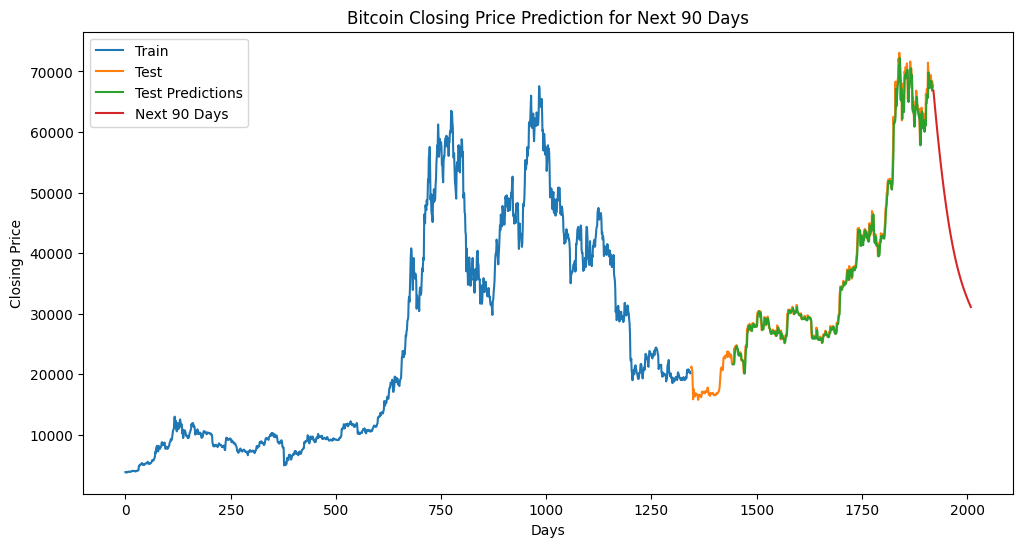

Predicted closing prices for the next 90 days:
[66820.234 66109.375 65356.562 64603.875 63859.05  63122.715 62395.758
 61678.066 60969.938 60271.24  59581.863 58902.695 58233.062 57573.23
 56923.14  56282.86  55652.297 55031.25  54419.984 53818.316 53226.535
 52644.7   52072.89  51510.605 50958.22  50415.895 49882.773 49359.55
 48845.965 48341.816 47846.81  47360.918 46884.215 46416.62  45957.984
 45508.33  45067.535 44635.44  44212.203 43797.805 43391.887 42994.316
 42605.09  42223.98  41850.91  41485.68  41128.34  40778.613 40436.48
 40101.91  39774.742 39454.688 39141.766 38835.73  38536.477 38243.73
 37957.38  37677.242 37403.164 37134.95  36872.496 36615.684 36364.29
 36118.188 35877.21  35641.21  35410.023 35183.57  34961.664 34744.09
 34530.67  34321.332 34115.91  33914.29  33716.336 33521.92  33330.89
 33143.164 32958.586 32777.04  32598.422 32422.611 32249.475 32078.943
 31910.9   31745.26  31581.928 31420.797 31261.807 31104.863]


In [25]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred_test)), y_pred_test, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **Chia train test theo tỉ lệ 6:4**

In [26]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('Btc.csv')
df1=df.reset_index()['Close']

In [27]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [28]:
# 4. Chia train, test
train_size = int(0.6 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [29]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [30]:
# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [31]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [32]:
# 8. Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 4s 86ms/step - loss: 0.0725 - val_loss: 0.0159
Epoch 2/100
17/17 [==============================] - 1s 57ms/step - loss: 0.0131 - val_loss: 0.0062
Epoch 3/100
17/17 [==============================] - 1s 87ms/step - loss: 0.0034 - val_loss: 9.9518e-04
Epoch 4/100
17/17 [==============================] - 2s 98ms/step - loss: 0.0011 - val_loss: 7.7118e-04
Epoch 5/100
17/17 [==============================] - 1s 65ms/step - loss: 8.6183e-04 - val_loss: 4.9529e-04
Epoch 6/100
17/17 [==============================] - 1s 59ms/step - loss: 7.5116e-04 - val_loss: 4.4288e-04
Epoch 7/100
17/17 [==============================] - 1s 57ms/step - loss: 7.2441e-04 - val_loss: 4.6498e-04
Epoch 8/100
17/17 [==============================] - 1s 58ms/step - loss: 6.9811e-04 - val_loss: 4.1648e-04
Epoch 9/100
17/17 [==============================] - 1s 55ms/step - loss: 6.8192e-04 - val_loss: 4.1157e-04
Epoch 10/100
17/17 [==============================] 

In [34]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred_test=model.predict(X_test)

21/21 [==============================] - 0s 12ms/step


In [35]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred_test=scaler.inverse_transform(y_pred_test)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [36]:
# 12. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, y_test)
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred_test, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 715.9333317742692
Testing RMSE: 1192.2235564587024
Testing MAPE: 0.01981947513599878


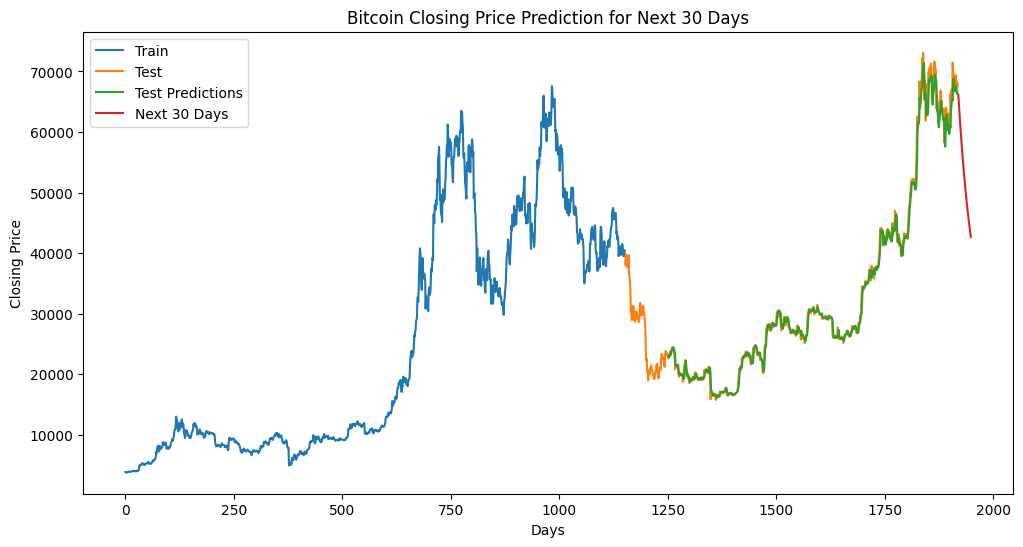

Predicted closing prices for the next 30 days:
[66122.42  65099.566 63984.22  62860.06  61761.965 60694.043 59661.293
 58659.414 57688.875 56746.105 55830.14  54945.383 54083.32  53246.184
 52432.17  51641.023 50870.895 50120.56  49391.93  48682.945 47995.977
 47330.105 46684.65  46055.992 45448.336 44860.3   44286.594 43733.797
 43198.297 42678.71 ]


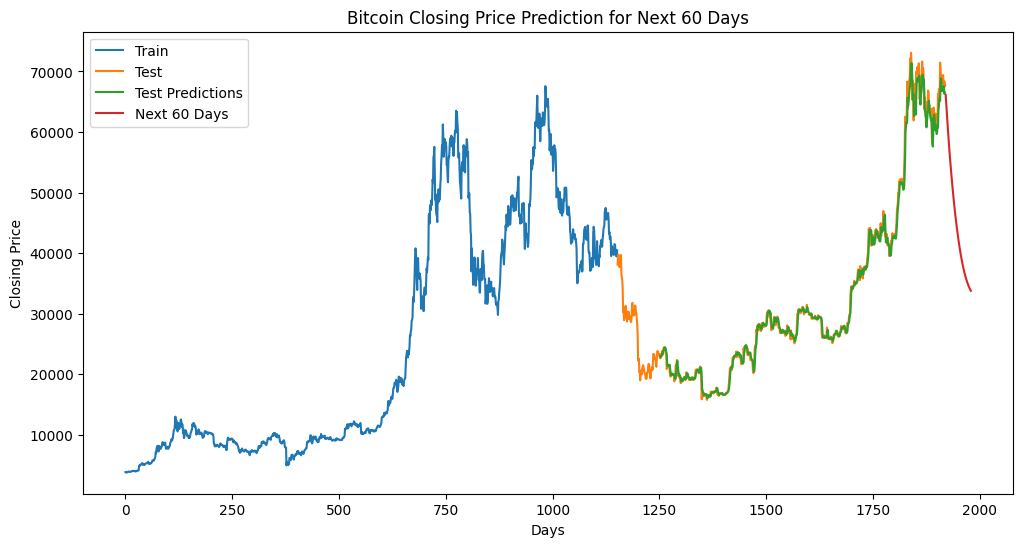

Predicted closing prices for the next 60 days:
[66122.42  65099.566 63984.22  62860.06  61761.965 60694.043 59661.293
 58659.414 57688.875 56746.105 55830.14  54945.383 54083.32  53246.184
 52432.17  51641.023 50870.895 50120.56  49391.93  48682.945 47995.977
 47330.105 46684.65  46055.992 45448.336 44860.3   44286.594 43733.797
 43198.297 42678.71  42174.344 41686.266 41215.246 40760.56  40321.62
 39899.254 39492.453 39101.02  38726.34  38367.61  38022.477 37691.27
 37374.5   37070.9   36780.484 36502.8   36238.453 35985.906 35745.92
 35518.28  35302.055 35096.207 34901.387 34716.43  34541.332 34374.86
 34217.28  34067.99  33926.76  33793.098]


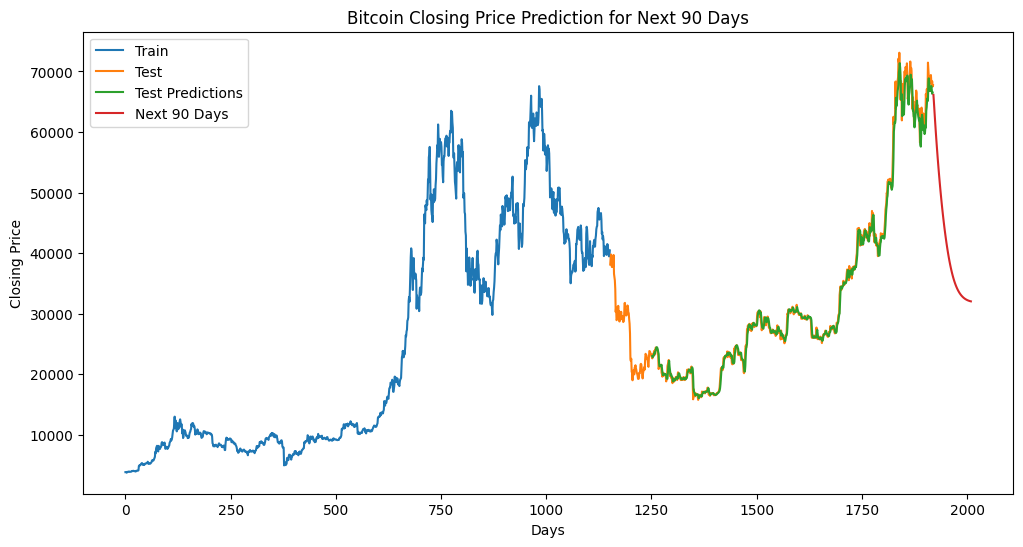

Predicted closing prices for the next 90 days:
[66122.42  65099.566 63984.22  62860.06  61761.965 60694.043 59661.293
 58659.414 57688.875 56746.105 55830.14  54945.383 54083.32  53246.184
 52432.17  51641.023 50870.895 50120.56  49391.93  48682.945 47995.977
 47330.105 46684.65  46055.992 45448.336 44860.3   44286.594 43733.797
 43198.297 42678.71  42174.344 41686.266 41215.246 40760.56  40321.62
 39899.254 39492.453 39101.02  38726.34  38367.61  38022.477 37691.27
 37374.5   37070.9   36780.484 36502.8   36238.453 35985.906 35745.92
 35518.28  35302.055 35096.207 34901.387 34716.43  34541.332 34374.86
 34217.28  34067.99  33926.76  33793.098 33667.125 33548.406 33436.36
 33330.863 33231.51  33138.03  33050.19  32967.977 32890.715 32817.92
 32749.402 32685.207 32625.088 32568.854 32516.273 32467.115 32421.148
 32378.373 32338.398 32301.105 32266.35  32234.01  32203.793 32175.812
 32149.797 32125.727 32103.41  32082.695 32063.68  32046.191]


In [37]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred_test)), y_pred_test, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())